# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [1]:
import torch

a = torch.FloatTensor(3, 5)
print(a)
print(a.mean())


 7.1104e-04  1.3556e-19  1.8567e-01  7.5553e+28  5.2839e-11
 4.6894e+27  3.2578e+27  1.8886e+31  4.7429e+30  2.0108e+20
 1.1257e+24  2.5176e-12  3.7572e-14  1.3556e-19  2.3301e-09
[torch.FloatTensor of size 3x5]

1.5808548430574585e+30


### are Numpy arrays inside

In [2]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


1.00000e-42 *
  0.0000  0.0000  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000  0.0000  0.0000
  1.7208  0.0000  0.0000  0.0000  0.0000
[torch.FloatTensor of size 3x5]



## Variables

In [3]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [4]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [5]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [6]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [7]:
# On se donne une donnée (x,y)
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))

# On cherche à apprendre les parametre d'un neurone 'logistique' pour expliquer au mieux (x,y)
# Pour cela on initialise d'abord les deux paramètres (w, b) à estimer
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

# On regarde la prédiction de ce modèle sur l'entrée x
h = torch.sigmoid(w * x + b)

# On compare cette sortie avec la vraie valeur y
error = (y - h)**2

# on calcule la valeur des dérivées partielles de la fonction error par rapport aux variables w et b (son gradient), et on stocke
# ces valeurs dans w.grad et b.grad. Attention, ce stockage en réalité additionne ces nouvelles valeurs aux valeurs précédentes
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


On minimize $L(y - h(x))$ pas à pas:

In [16]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))

b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)


# avec alpha = 0.2 et 100 itération on en est à (w = 1.2 , b = -3.18) et une erreur quadratique (y-h(x))^2 = (0.07)^2


# L'erreur L est la norme L2
alpha = 1
for i in range(100):
    h = torch.sigmoid(w * x + b)
    error = (y - h)**2
    error.backward()
    
    w.data.sub_(alpha * w.grad.data)
    w.grad.data.zero_()  #  on réinitialise la valeur stockée dans w.grad
    
    b.data.sub_(alpha * b.grad.data)
    b.grad.data.zero_()  # on réinitialise la valeur stockée dans b.grad
    
    print('Epoch {} h={:.05f} w={:.05f} b={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0]))

    

Epoch 1 h=0.92414 w=2.84770 b=-2.10153
Epoch 2 h=0.89753 w=2.65524 b=-2.22984
Epoch 3 h=0.85233 w=2.40893 b=-2.39404
Epoch 4 h=0.77195 w=2.10687 b=-2.59542
Epoch 5 h=0.63758 w=1.80353 b=-2.79765
Epoch 6 h=0.47693 w=1.59628 b=-2.93582
Epoch 7 h=0.36786 w=1.47917 b=-3.01388
Epoch 8 h=0.31107 w=1.40777 b=-3.06149
Epoch 9 h=0.27892 w=1.36015 b=-3.09323
Epoch 10 h=0.25865 w=1.32641 b=-3.11572
Epoch 11 h=0.24488 w=1.30152 b=-3.13232
Epoch 12 h=0.23504 w=1.28261 b=-3.14492
Epoch 13 h=0.22776 w=1.26797 b=-3.15469
Epoch 14 h=0.22223 w=1.25644 b=-3.16237
Epoch 15 h=0.21794 w=1.24727 b=-3.16849
Epoch 16 h=0.21457 w=1.23990 b=-3.17340
Epoch 17 h=0.21189 w=1.23394 b=-3.17737
Epoch 18 h=0.20975 w=1.22910 b=-3.18060
Epoch 19 h=0.20801 w=1.22514 b=-3.18324
Epoch 20 h=0.20660 w=1.22189 b=-3.18541
Epoch 21 h=0.20545 w=1.21922 b=-3.18719
Epoch 22 h=0.20451 w=1.21702 b=-3.18865
Epoch 23 h=0.20373 w=1.21520 b=-3.18986
Epoch 24 h=0.20310 w=1.21370 b=-3.19087
Epoch 25 h=0.20257 w=1.21246 b=-3.19170
Epoch 26 

Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

Un alpha à 100 donne une convergence des paramètres en 2 étapes ! Un alpha à 10 fait un convergence des paramètres en 30 étapes, un alpha à 1 converge en 60 étapes, et plus le alpha est petit, plus la convergence se fait lentement. La valeur des paramètres obtenue est complètement aux fraises pour un alpha trop grand, et donne sensiblement les mêmes valeurs (w = 1.20 , b = -3.19) pour un alpha inférieur à 10 (ce qui reste absolument énorme). On observe une réelle convergence des paramètres sur cet exemple et non une oscillation des valeurs des paramètres autour d'un minimum local de la fonction de coût.

In [13]:
#FENETRE D'ESSAIS
X = Variable(torch.FloatTensor(1,2))
print(X)
W = Variable(torch.normal(torch.zeros(2, 1), 1), requires_grad=True)

print(torch.mm(X,W))

a = torch.Tensor([[1, 2, 3], [1, 2, 3]]).view(-1, 2)
b = torch.Tensor([[2, 1]]).view(2, -1)
print(a)
print(b)

Variable containing:
1.00000e-45 *
  1.4013  0.0000
[torch.FloatTensor of size 1x2]

Variable containing:
1.00000e-45 *
  1.4013
[torch.FloatTensor of size 1x1]


 1  2
 3  1
 2  3
[torch.FloatTensor of size 3x2]


 2
 1
[torch.FloatTensor of size 2x1]



# A vous de jouer !

Voici un jeu de données synthetique.

In [2]:
import numpy as np
import torch

np.random.seed(61)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5, # 5000 points placés aléatoirement dans le carré de côté 1 centré en 0
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))), # 2500 points dans un petit cercle en bas à droite
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))), # 2500 points dans un petit cercle en haut à gauche
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

In [3]:
# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(61)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

On crée deux jeux séparés: train / test.

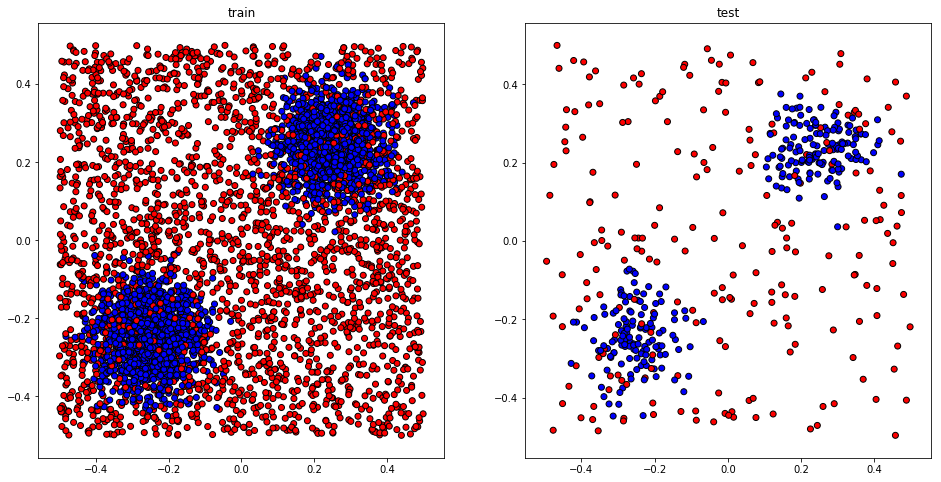

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 5000
n_test = 500

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].X_trainnumpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrics: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [5]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
params = []

n_out = 1

# On crée nos deux paramètres du neurone, que l'on initialise. b est une valeur par défaut égale à 0
# W est un vecteur colonne à 2 coordonnées généré aléatoirement

W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    H = torch.sigmoid(torch.mm(X,W) + b) # neurone    
    return H

#Vraissemblance a maximiser -> log vraissemblance = -log(Vraissemblance) = perte à minimiser
def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps) 
    return loss


n_epochs = 50
epoch_n_batches = 100
train_batch_size = 50
alpha = 0.01

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb,Y_mb).sum() # perte entre valeur prédite et valeur observée
        # Backward pass
        
        loss.backward()

        # Parameter update (gradient descent)
        W.data -= alpha * W.grad.data
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data -= alpha * b.grad.data
        b.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # La perte évaluée sur la donnée test
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Erreur moyenne sur la donnée test (pour le 0-1 Loss)
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=34.994537	test loss=0.695929	0/1 error=0.608
Epoch 002	train loss=34.765474	test loss=0.691039	0/1 error=0.350
Epoch 003	train loss=34.747582	test loss=0.692904	0/1 error=0.574
Epoch 004	train loss=34.692083	test loss=0.696180	0/1 error=0.548
Epoch 005	train loss=34.711272	test loss=0.691191	0/1 error=0.412
Epoch 006	train loss=34.697908	test loss=0.692179	0/1 error=0.432
Epoch 007	train loss=34.678865	test loss=0.690075	0/1 error=0.456
Epoch 008	train loss=34.698860	test loss=0.695330	0/1 error=0.544
Epoch 009	train loss=34.699827	test loss=0.694818	0/1 error=0.566
Epoch 010	train loss=34.696876	test loss=0.693205	0/1 error=0.426
Epoch 011	train loss=34.706332	test loss=0.693601	0/1 error=0.406
Epoch 012	train loss=34.699236	test loss=0.694288	0/1 error=0.516
Epoch 013	train loss=34.704952	test loss=0.693830	0/1 error=0.566
Epoch 014	train loss=34.688371	test loss=0.692372	0/1 error=0.470
Epoch 015	train loss=34.696660	test loss=0.696831	0/1 error=0.604
Epoch 016	

Visualisez la distribution apprise par votre modèle:

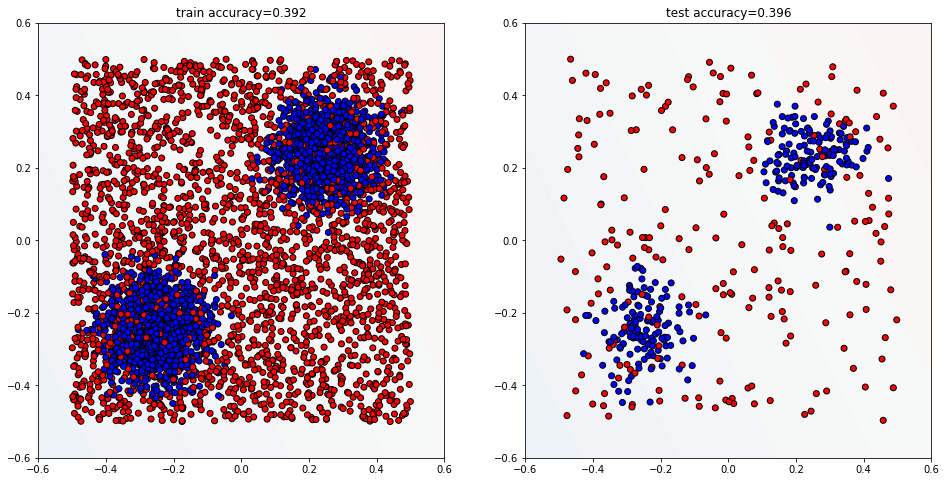

In [6]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.

In [15]:
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

torch.manual_seed(137)

n_in = 2
params = []

n_layer = 10

n_out = 1

# On crée nos deux paramètres du neurone, que l'on initialise. b est un vecteur de longueur 10 par défaut égal à 0
# W est une matrice 2 par 10 générée aléatoirement

W = Variable(torch.normal(torch.zeros(n_in, n_layer), np.sqrt(2/(n_in + n_layer))), requires_grad=True)
b = Variable(torch.zeros(n_layer), requires_grad=True)

W2 = Variable(torch.normal(torch.zeros(n_layer, n_out), np.sqrt(2/(n_layer + n_out))), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    Z = F.relu(torch.mm(X, W) + b)      # rectified linear unit (ReLU)
    H = torch.sigmoid(torch.mm(Z, W2) + b2) 
    return H

#Vraissemblance a maximiser -> log vraissemblance = -log(Vraissemblance) = perte à minimiser
def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps) 
    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 50
alpha = 0.01

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb,Y_mb).sum() # perte entre valeur prédite et valeur observée
        # Backward pass
        
        loss.backward()

        # Parameter update (gradient descent)
        W.data -= alpha * W.grad.data
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data -= alpha * b.grad.data
        b.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # La perte évaluée sur la donnée test
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Erreur moyenne sur la donnée test (pour le 0-1 Loss)
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=33.191555	test loss=0.641539	0/1 error=0.180
Epoch 002	train loss=31.422328	test loss=0.620340	0/1 error=0.176
Epoch 003	train loss=30.053867	test loss=0.593653	0/1 error=0.184
Epoch 004	train loss=29.057777	test loss=0.576919	0/1 error=0.154
Epoch 005	train loss=28.064772	test loss=0.559033	0/1 error=0.168
Epoch 006	train loss=27.336624	test loss=0.556807	0/1 error=0.156
Epoch 007	train loss=26.831855	test loss=0.538182	0/1 error=0.154
Epoch 008	train loss=26.244378	test loss=0.528254	0/1 error=0.156
Epoch 009	train loss=25.660429	test loss=0.522752	0/1 error=0.150
Epoch 010	train loss=25.433338	test loss=0.514795	0/1 error=0.158
Epoch 011	train loss=24.962488	test loss=0.515687	0/1 error=0.160
Epoch 012	train loss=25.153244	test loss=0.508852	0/1 error=0.160
Epoch 013	train loss=24.957039	test loss=0.504177	0/1 error=0.158
Epoch 014	train loss=24.830289	test loss=0.497922	0/1 error=0.156
Epoch 015	train loss=24.615790	test loss=0.503153	0/1 error=0.162
Epoch 016	

Epoch 128	train loss=21.404923	test loss=0.433643	0/1 error=0.166
Epoch 129	train loss=21.095861	test loss=0.434439	0/1 error=0.174
Epoch 130	train loss=21.783841	test loss=0.433534	0/1 error=0.156
Epoch 131	train loss=21.447828	test loss=0.435815	0/1 error=0.172
Epoch 132	train loss=21.258448	test loss=0.432712	0/1 error=0.168
Epoch 133	train loss=21.352850	test loss=0.433420	0/1 error=0.174
Epoch 134	train loss=21.269455	test loss=0.432795	0/1 error=0.162
Epoch 135	train loss=21.289136	test loss=0.432707	0/1 error=0.164
Epoch 136	train loss=21.648646	test loss=0.432279	0/1 error=0.160
Epoch 137	train loss=21.712242	test loss=0.431098	0/1 error=0.162
Epoch 138	train loss=21.236623	test loss=0.432652	0/1 error=0.166
Epoch 139	train loss=21.172803	test loss=0.432588	0/1 error=0.166
Epoch 140	train loss=21.043800	test loss=0.432365	0/1 error=0.168
Epoch 141	train loss=21.246102	test loss=0.432905	0/1 error=0.168
Epoch 142	train loss=21.771625	test loss=0.433473	0/1 error=0.174
Epoch 143	

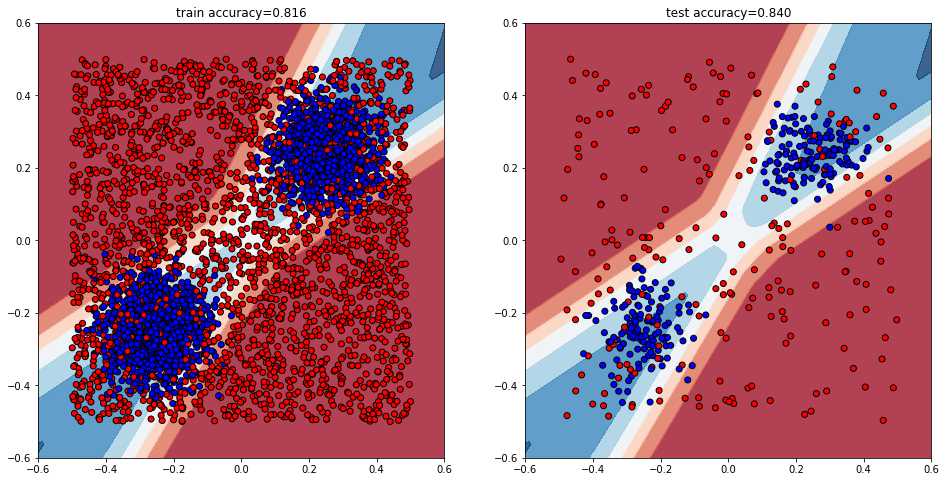

In [16]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Bonus: améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc. On fait un réseau de neurones à deux couches cachées, la première avec 40 neurones et la seconde avec 20.

In [17]:
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

torch.manual_seed(0)

n_in = 2
params = []

n_layer = 40
n_layer2 = 20

n_out = 1

# On crée nos deux paramètres du neurone, que l'on initialise. b est une valeur par défaut égale à 0
# W est un vecteur colonne à 2 coordonnées par défaut générée aléatoirement

W = Variable(torch.normal(torch.zeros(n_in, n_layer), np.sqrt(2/(n_in + n_layer))), requires_grad=True)
b = Variable(torch.zeros(n_layer), requires_grad=True) # !!! doit etre un vecteur ligne si je comprends bien

W2 = Variable(torch.normal(torch.zeros(n_layer, n_layer2), np.sqrt(2/(n_layer + n_layer2))), requires_grad=True)
b2 = Variable(torch.zeros(n_layer2), requires_grad=True)

W3 = Variable(torch.normal(torch.zeros(n_layer2, n_out), np.sqrt(2/(n_layer2 + n_out))), requires_grad=True)
b3 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    Z = F.relu(torch.mm(X, W) + b)      # ou F.relu( ) ? rectified linear unit (ReLU)
    Z2 = F.relu(torch.mm(Z, W2) + b2) 
    H = torch.sigmoid(torch.mm(Z2, W3) + b3) 
    return H

# Vraissemblance = gain a maximiser ->  -log(Vraissemblance) = perte à minimiser
def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps) 
    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 50
alpha = 0.01

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb,Y_mb).sum() # perte entre valeur prédite et valeur observée
        # Backward pass
        
        loss.backward()

        # Parameter update (gradient descent)
        W.data -= alpha * W.grad.data
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data -= alpha * b.grad.data
        b.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # La perte évaluée sur la donnée test
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Erreur moyenne sur la donnée test (pour le 0-1 Loss)
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=33.487092	test loss=0.656467	0/1 error=0.286
Epoch 002	train loss=32.687302	test loss=0.644752	0/1 error=0.232
Epoch 003	train loss=31.919493	test loss=0.630458	0/1 error=0.262
Epoch 004	train loss=31.283983	test loss=0.619810	0/1 error=0.252
Epoch 005	train loss=31.057226	test loss=0.612100	0/1 error=0.206
Epoch 006	train loss=30.412698	test loss=0.603921	0/1 error=0.210
Epoch 007	train loss=30.018405	test loss=0.595602	0/1 error=0.198
Epoch 008	train loss=29.789119	test loss=0.589883	0/1 error=0.204
Epoch 009	train loss=29.321542	test loss=0.581209	0/1 error=0.186
Epoch 010	train loss=28.965691	test loss=0.575661	0/1 error=0.178
Epoch 011	train loss=28.765136	test loss=0.570714	0/1 error=0.176
Epoch 012	train loss=28.481200	test loss=0.565984	0/1 error=0.166
Epoch 013	train loss=28.102757	test loss=0.560857	0/1 error=0.160
Epoch 014	train loss=27.907612	test loss=0.554356	0/1 error=0.168
Epoch 015	train loss=27.572007	test loss=0.550736	0/1 error=0.158
Epoch 016	

Epoch 127	train loss=21.256480	test loss=0.423115	0/1 error=0.148
Epoch 128	train loss=21.118105	test loss=0.424701	0/1 error=0.152
Epoch 129	train loss=20.663287	test loss=0.424454	0/1 error=0.152
Epoch 130	train loss=20.526779	test loss=0.422030	0/1 error=0.150
Epoch 131	train loss=21.200560	test loss=0.424116	0/1 error=0.148
Epoch 132	train loss=20.688528	test loss=0.422011	0/1 error=0.146
Epoch 133	train loss=21.109216	test loss=0.422860	0/1 error=0.148
Epoch 134	train loss=20.425082	test loss=0.422042	0/1 error=0.148
Epoch 135	train loss=20.827463	test loss=0.421445	0/1 error=0.150
Epoch 136	train loss=20.955972	test loss=0.421458	0/1 error=0.152
Epoch 137	train loss=20.711748	test loss=0.420081	0/1 error=0.146
Epoch 138	train loss=20.804700	test loss=0.420319	0/1 error=0.148
Epoch 139	train loss=20.686309	test loss=0.418904	0/1 error=0.150
Epoch 140	train loss=20.595918	test loss=0.420511	0/1 error=0.148
Epoch 141	train loss=20.465568	test loss=0.419030	0/1 error=0.148
Epoch 142	

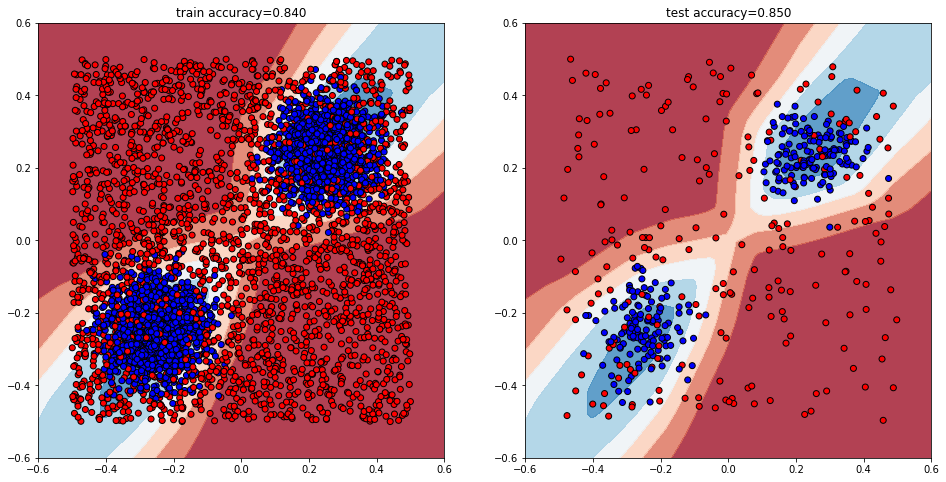

In [18]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Une version en TensorFlow est décrite sur http://blog.xebia.fr/2017/04/11/tensorflow-deep-learning-episode-3-modifiez-votre-reseau-de-neurones-en-toute-simplicite/ 

# MNIST

Vous allez maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc. Des exemples d'implémentation d'un réseau de neurones sont trouvables sur
 
 http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
 
 http://blog.gaurav.im/2017/04/24/a-gentle-intro-to-pytorch/
 
 http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
 
 http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/210_Convolution_MNIST.html#convolutionmnistrst
 
 http://blog.xebia.fr/2017/04/11/tensorflow-deep-learning-episode-3-modifiez-votre-reseau-de-neurones-en-toute-simplicite/ (en TensorFlow)
 

On commence par charger les données:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch.utils.data as data
from PIL import Image
import os
import os.path
import errno
import torch
import codecs

from torchvision import datasets, transforms

mnist_folder = './MNIST_data/'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

In [3]:
print("Nombre d'images dans le train set:", len(train_data))
print("Nombre d'images dans le train set:", len(test_data))

Nombre d'images dans le train set: 60000
Nombre d'images dans le train set: 10000


### Afficher quelques images

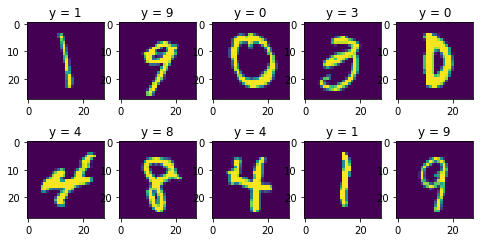

In [100]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 733 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy() # numpy array de dim 3, avec 1*28*28 valeurs dans [0, 1]
    y = train_data[idx][1] # numéro entre 0 et 9
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y = {}'.format(y))
    
plt.show()

### Modèle initial

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.1
epochs = 25
train_batch_size = 10
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True) # crée des racks de 10 images
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)
        

    def forward(self, X):
        X = X.view(-1, 28*28)  # transforme une image 28*28 en ligne de 784 valeurs
        X = self.fc1(X)
        return F.log_softmax(X)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr) 

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))


Epoch 1...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train negative log-likelihood: 0.362772
Test  negative log-likelihood: 0.294563 0/1 error: 0.083200
Epoch 2...
Train negative log-likelihood: 0.302695
Test  negative log-likelihood: 0.290107 0/1 error: 0.080900
Epoch 3...
Train negative log-likelihood: 0.291658
Test  negative log-likelihood: 0.288073 0/1 error: 0.079500
Epoch 4...
Train negative log-likelihood: 0.285517
Test  negative log-likelihood: 0.299710 0/1 error: 0.081800
Epoch 5...
Train negative log-likelihood: 0.281135
Test  negative log-likelihood: 0.277646 0/1 error: 0.075900
Epoch 6...
Train negative log-likelihood: 0.278610
Test  negative log-likelihood: 0.289195 0/1 error: 0.083600
Epoch 7...
Train negative log-likelihood: 0.275453
Test  negative log-likelihood: 0.291415 0/1 error: 0.083400
Epoch 8...
Train negative log-likelihood: 0.272424
Test  negative log-likelihood: 0.274635 0/1 error: 0.076400
Epoch 9...
Train negative log-likelihood: 0.271329
Test  negative log-likelihood: 0.292795 0/1 error: 0.079300
Epoch 10...


Jouez avec les paramètres suivants:
- lr
- epochs
- train_batch_size

Quelle est la meilleure performance (0/1 error) que vous arrivez à atteindre?

Les résultats selon la configuration :

(lr = 0.1, epochs = 25, train_batch_size = 50 ) : Train negative log-likelihood: 0.255545,     Test negative log-likelihood: 0.267748,      0/1 error: 0.075300

(lr = 0.5, epochs = 25, train_batch_size = 50 ) : Train negative log-likelihood: 0.260592, Test  negative log-likelihood: 0.288959, 0/1 error: 0.081400

(lr = 0.1, epochs = 25, train_batch_size = 10 ) : Train negative log-likelihood: 0.257962, Test  negative log-likelihood: 0.284569, 0/1 error: 0.078700

(lr = 0.1, epochs = 50, train_batch_size = 50 ) : Train negative log-likelihood: 0.245841, Test  negative log-likelihood: 0.265342, 0/1 error: 0.073600

(lr = 0.05, epochs = 50, train_batch_size = 10 ) : Train negative log-likelihood: 0.243141, Test  negative log-likelihood: 0.271344, 0/1 error: 0.074000

L'erreur 0-1 minimale obtenue correspond à 7,36 % de mal classés.

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats. Des exemples sont décrits sur la page officielle de PyTorch http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html ainsi que sur https://gist.github.com/reddragon/3fa9c3ee4d10a7be242183d2e98cfc5d.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées. On affiche les taux d'erreurs de réseaux de neurones à 1, 2 et 3 couches et sur 25 epochs : ![3 couches cachées](graphique_couches.png)
Le taux d'erreur en dents de scie suggère de diminuer le taux d'apprentissage en fonction de la valeur de perte.


- convolutions + max pooling. Voir http://pytorch.org/docs/master/nn.html#conv2d + http://pytorch.org/docs/master/nn.html#maxpool2d. Une brève description du principe de convolution (2D ici, qui est une application de la convolution sur $\mathbb{Z}^2$ au sens mathématique si le terme de biai est absent) est tirée de https://arxiv.org/pdf/1603.07285.pdf : On transforme un tenseur 2D de valeurs en remplaçant chaque entrée par une somme pondérée des valeurs dans une fenêtre autour de cette entrée, plus un terne de biai. Les poids et le biai sont des termes calibrés par l'apprentissage. Un coefficient de stride s > 1 signifie que l'on applique une convolution usuelle puis on ne garde que 1 entrée sur s du tenseur de sortie dans les 2 directions. Un nombre $N_{in}$ de canaux en entrée signifie autant de Tenseurs 2D à traiter, tandis que $N_{out}$ canaux en sortie signifie autant de tenseurs à créer, ce qui implique $N_{in}*N_{out}$ noyaux de convolutions à utiliser. Le max-pooling suit un principe similaire, mais fournit la valeur max dans une fenêtre autour d'une entrée au lieu d'une somme pondérée dans cette fenêtre.

 Les graphiques suivant montrent la succession d'une couche de convolution sur une fenêtre 5 par 5 suivie d'un max pooling sur une fenêtre 2 par 2, où on a de gauche à droite un nombre de canaux de sortie de convolution égal à 1, 5 et 10, suivie de deux couches cachées de neurones. On constate que l'ajout d'une couche de convolution avec un seul canal en sortie derrière 2 couches de neurones n'améliore pas la performance (c'est assez normal puisque cela ne fait que 'flouter' les images), et que spécifier plusieurs canaux de sortie est la caractéristique clé pour améliorer les performances. En effet, avec l'ajout de canaux on frise le 99 % de réussites (graphique de droite) : ![3 couches cachées](graphique_convo_maxpooling_couches.png)
 

- dropout. Voir la brève explication sur http://pytorch.org/docs/master/nn.html#dropout2d ainsi que l'article https://arxiv.org/pdf/1411.4280.pdf . Le principe du dropout est de modifier un tenseur en posant la valeur de chaque élément comme égale à 0 avec probabilité $p \in [0,1]$, avec p un paramètre défini au préalable. L'objectif de ceci est de corriger une possible dépendance trop forte de l'apprentissage aux valeurs de quelques 'pixels' en particulier, et ainsi tourner l'apprentissage sur des formes globales des images d'entrainement. En fixant comme paramètre "d'évacuation" la valeur p = 0.2 (à gauche), puis en intégrant une diminution adaptative du taux d'apprentissage (au centre) et enfin en ajoutant une descente de gradient par Adam on obtient ![3 couches cachées](graphique_conv_maxpooling_dropout_couches.png)


- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$

A propos de la différence entre définir des opérations dans le réseau dans la partie init ou la partie forward, voir https://discuss.pytorch.org/t/how-to-choose-between-torch-nn-functional-and-torch-nn-module/2800/14 

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [159]:
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())

None
False


In [ ]:
# La liste des optimiseurs
'SGD' : optim.SGD(params, lr=lr),
'ASGD' : optim.ASGD(params, lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0), 
'Adadelta' : optim.Adadelta(params, lr=0.01, rho=0.9, eps=1e-06, weight_decay=0),
'Adagrad' : optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0),
'Adam' : optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0), 
'Adamax' : optim.Adamax(params, lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0),
'RMSp' : optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False),
'Rp' : optim.Rprop(params, lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


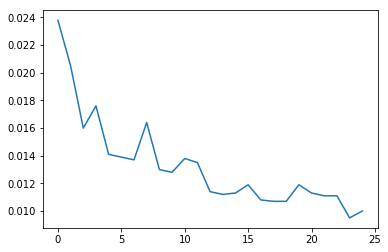

In [21]:
#--------------- Paramètres de base de l'apprentissage --------------
seed = 1337
lr = 0.05
epochs = 25
train_batch_size = 10
test_batch_size = 100
torch.manual_seed(seed)
train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)



#----------------------- Le modèle -----------------------------------
class Net(nn.Module):
    def __init__(self): # Définit la structure du réseau de neurones
        super(Net, self).__init__()
        
        # les convolutions, 
        self.conv1 = nn.Conv2d(1,10,5)
        self.pool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout2d(p=0.2)
        
        self.fc1 = nn.Linear(1440, 40) #10*12*12 = 1440
        self.fc2 = nn.Linear(40, 20)
        self.fc3 = nn.Linear(20, 10) 

    def forward(self, X): # Fait circuler la donnée dans le réseau construit en __init__
        
        # convolution + Max pooling
        X = self.conv1(X)
        X = F.relu(X)
        X = self.pool(X)
        X = self.dropout(X)
        
        X = X.view(-1, self.num_flat_features(X))  # flatten images 
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X) 
    
    def num_flat_features(self, X):
        size = X.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

model = Net()



# ------------------------ Méthode d'optimisation des paramètres du modèle --------------------
params = model.parameters()

# l'optimiseur : définit comment les paramètres sont optimisés à partir du gradient de l'erreur stocké dans ces paramètres
# infos sur http://pytorch.org/docs/master/optim.html
# voir peut être aussi http://www.cs.toronto.edu/~fritz/absps/momentum.pdf

# 'SGD' : stochastic gradient descent
# 'ASGD' : averaged stochastic gradient descent
# 'Adadelta' : 12-2012, https://arxiv.org/pdf/1212.5701.pdf
# 'Adagrad' : 07-2012, http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf
# 'Adam' : 12-2014, https://arxiv.org/pdf/1412.6980.pdf
# 'Adamax'
# 'RMSp' 
# 'Rp'     
optimizer = optim.SGD(params, lr=lr) #  optim.Adam(params, lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0) #optim.SGD(params, lr=lr) #




# réduction du taux d'apprentissage en fonction de la valeur de gradient scheduler 
# Explications dans http://pytorch.org/docs/master/_modules/torch/optim/lr_scheduler.html
# mettre un 'max' si on maximise un gain dans l'apprentissage 

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', factor = 0.5, patience = 5, verbose  = False)



#---------------- Fonction d'apprentissage ----------------------------
def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Calcul de la sortie prédite par le modèle
        Y_pred_prob = model(X)

        # Calcul de l'erreur
        loss = F.nll_loss(Y_pred_prob, Y)

        # Rétro-propagation du gradient de l'erreur dans les paramètres
        loss.backward()
        
        # Applique la mise à jour des paramètres (descente de gradient)
        optimizer.step()
        
        # Modifie le taux d'apprentissage de l'optimiseur en fonction de l'importance de l'erreur
        #scheduler.step(loss.data[0])
        
        # Initialisation du gradient
        optimizer.zero_grad()

        # Paramètres pour la perte moyenne
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss



#----------------------- Fonction de test --------------------------------
def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error



#-------------------- Apprentissage du réseau -------------------------
LOSS = []
for epoch in range(1, epochs + 1):
    
    #print('Epoch {}...'.format(epoch))
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    
    train_loss = train(epoch)
    test_loss, test_error = test()
    scheduler.step(test_loss)
    LOSS.append(test_error)
    if epoch % 5 == 0:
        print(epoch)
    

plt.plot(range(epochs), LOSS)


In [27]:
LOSS_29 = list(LOSS)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


30
31
32
33
34
35
36
37
38
39


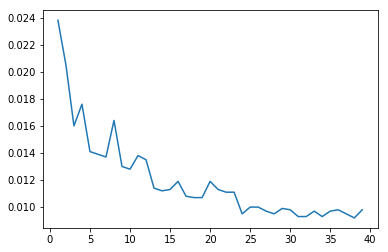

In [28]:
for epoch in range(30, 40):
    
    #print('Epoch {}...'.format(epoch))
    #print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    #print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    
    train_loss = train(epoch)
    test_loss, test_error = test()
    scheduler.step(test_loss)
    LOSS.append(test_error)
    print(epoch)
    

plt.plot(range(1,len(LOSS)+1), LOSS)

In [31]:
LOSS_40 = list(LOSS)

## NLP: N-Gram Language Modeling

Des leins concernant le Natural Langage Processing (NLP):

 http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td2a_TD5_Traitement_automatique_des_langues_en_Python.html#td2atd5traitementautomatiquedeslanguesenpythonrst
 
 http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td2a_some_nlp.html#td2asomenlprst
 
 https://devblogs.nvidia.com/recursive-neural-networks-pytorch/

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader


CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)} # dictionnaire des mots avec numéro associé


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context] # on prend la liste des numéros des mots du contexte 'context' (2 mots)
        context_var = Variable(torch.LongTensor(context_idxs)) # ex : Variable(torch.LongTensor([23, 12]))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
 520.5421
[torch.FloatTensor of size 1]
, 
 496.4907
[torch.FloatTensor of size 1]
, 
 473.5755
[torch.FloatTensor of size 1]
, 
 451.1024
[torch.FloatTensor of size 1]
, 
 428.5131
[torch.FloatTensor of size 1]
, 
 405.3557
[torch.FloatTensor of size 1]
, 
 381.4083
[torch.FloatTensor of size 1]
, 
 356.6346
[torch.FloatTensor of size 1]
, 
 331.1460
[torch.FloatTensor of size 1]
, 
 305.0810
[torch.FloatTensor of size 1]
, 
 278.6663
[torch.FloatTensor of size 1]
, 
 252.1751
[torch.FloatTensor of size 1]
, 
 225.9886
[torch.FloatTensor of size 1]
, 
 200.5330
[torch.FloatTensor of size 1]
, 
 176.2567
[torch.FloatTensor of size 1]
, 
 153.6345
[torch.FloatTensor of size 1]
, 
 133.0435
[torch.FloatTensor of size 1]
, 
 114.7289
[torch.FloatTensor of size 1]
, 
 98.7953
[torch.FloatTensor of size 1]
, 
 85.2051
[torch.FloatTensor of size 1]
, 
 73.7610
[torch.FloatTensor of size 1]
, 
 64.2626
[torch.FloatTensor of size 1]
, 
 56.3751
[torch.FloatTensor of size 1]
, 
 49.8667
[torc

### Utilisez vos propres valeurs pour context

In [6]:
# context = # TODO
context = ['own', 'deep']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['own', 'deep'] sunken


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader


CONTEXT_SIZE = 4  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()


# création de l'ensemble de mots sans répétition
vocab = set(raw_text)
vocab_size = len(vocab)

# dictionnaire des mots numérotés
word_to_ix = {word: i for i, word in enumerate(vocab)}

# création de la liste des (contexte, cible)
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
    
print(data[:5])# petit test


# fonction associant à (contexte, dictionnaire de mots numérotés) la variable torch avec les numéros des mots du contexte
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)



class CBOW(nn.Module):

#    def __init__(self):
#        pass

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

#    def forward(self, inputs):
#        pass

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = CBOW(vocab_size, EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    total_loss = torch.Tensor([0])
    for context, target in data:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_var = make_context_vector(context, word_to_ix)
        
        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
 230.0525
[torch.FloatTensor of size 1]
, 
 216.5934
[torch.FloatTensor of size 1]
, 
 203.8003
[torch.FloatTensor of size 1]
, 
 191.2982
[torch.FloatTensor of size 1]
, 
 178.7821
[torch.FloatTensor of size 1]
, 
 166.1174
[torch.FloatTensor of size 1]
, 
 153.2712
[torch.FloatTensor of size 1]
, 
 140.2806
[torch.FloatTensor of size 1]
, 
 127.2352
[torch.FloatTensor of size 1]
, 
 114.2251
[torch.FloatTensor of size 1]
, 
 101.4955
[torch.FloatTensor of size 1]
, 
 89.1721
[torch.FloatTensor of size 1]
, 
 77.4891
[torch.FloatTensor of size 1]
, 
 66.6725
[torch.FloatTensor of size 1]
, 
 56.8957
[torch.FloatTensor of size 1]
, 
 48.2328
[torch.FloatTensor of size 1]
, 
 40.7660
[torch.FloatTensor of size 1]
, 
 34.4340
[torch.FloatTensor of size 1]
, 
 29.1623
[torch.FloatTensor of size 1]
, 
 24.8087
[torch.FloatTensor of size 1]
, 
 21.2452
[torch.FloatTensor of size 1]
, 
 18.3301
[torch.FloatTensor of size 1]
, 
 15.9340
[torch.FloatTensor of size 1]
, 
 13.9721
[torch.Float

In [73]:
context = ['People', 'create', 'to','direct']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['People', 'create', 'to', 'direct'] programs


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
